In [1]:
import requests
import random
import os
import time
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To access the COD API We need to generate a random device id and then register it. I suppose this is a security measure? We'll need this device Id in future API calls where authentication is required.

We'll also get an access token in return that we will need.

In [17]:
device_id = hex(random.getrandbits(128)).lstrip("0x")
payload =  {"deviceId": device_id}
resp = requests.post('https://profile.callofduty.com/cod/mapp/registerDevice', json=payload)

access_token = resp.json()['data']['authHeader']

In [22]:
headers = {
    "Authorization": f"Bearer {access_token}",
    "x_cod_device_id" : device_id,
}

data = {'email': os.environ.get('COD_EMAIL'), 'password': os.environ.get('COD_PW')}

resp_login = requests.post('https://profile.callofduty.com/cod/mapp/login', headers=headers, json=data)

In [23]:
resp_login.cookies

<RequestsCookieJar[Cookie(version=0, name='ACT_SSO_COOKIE', value='MTQ2ODg5Mzg2OTUwMjIyMjA0NzA6MTYyOTkwMDk1NTU5MjpiOTJmNGZjOGQzMjI2MzBhODkwYzgyMWJlOGQzMTYzYg', port=None, port_specified=False, domain='.callofduty.com', domain_specified=True, domain_initial_dot=False, path='/', path_specified=True, secure=True, expires=1629900955, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='ACT_SSO_COOKIE_EXPIRY', value='1629900955592', port=None, port_specified=False, domain='.callofduty.com', domain_specified=True, domain_initial_dot=False, path='/', path_specified=True, secure=True, expires=1629900955, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='XSRF-TOKEN', value='506RY1mlJBIj4xm2y5bC2lrDp7dCQLpj8XBqeWQDo6Fmv6w3C5AqM7CPA_4UJK7w', port=None, port_specified=False, domain='.callofduty.com', domain_specified=True, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, dis

In [24]:
resp_login.json()

{'rtkn': 'eyJhbGciOiAiQTEyOEtXIiwgImVuYyI6ICJBMTI4R0NNIiwgImtpZCI6ICJ1bm9fcHJvZF9sYXNfMSJ9.OXZA_jpvoBrYNhF9oQ47lOxwVLXvZJTEgN6GLPOqXRidmQNhKdYR2w.vBxN2j46c6f7XiV9.IAIpEUrcshSmTfZGLO6yUOHdLVXtP0FtlnZBaqMBLjuIQZ0rxbMPbePF4Y1NtdNLGwr_DginN_ebmW2kV3CeWYURRM54kaKy7e2l4PkQmCeBf2bp2qzP8rWXc_aD2_vrIXLdpEXHyTUwwjnXwcfUtk02VD-WA5LgYmNJzSiTgNdLF96CykNwv4ce7BMvbVauzN1h-NWOCmwkp3bZprNpyM9tXQPUlp1kGG3A3n3u0-skZayFBm6MSb7xx_weNwiFAKoo-2ik3ITB22aCE6ZBsUtGyi7A1WmsKmiApTjquQX9hI7U9kiCKz24UGsd02UFEWmZS4OfiJ7BDL1Mjn8dcuFfHwMG_W2uyKBjKncA4RsmhhHzHraCyW0D4KbJU9rObCbfMHXtDw1-6Y9mJ-BYg8uIGieGcgAUabZBFC_XQA0OGOP23vgEExESRh4u6uUN0TdFFzsESMNwW9JwJRTUYyv7pH0o0eY8-npeim_Dc9XeS52I9RhMbWAgT2SpIuZ7_j3vW2lFuOvwEMNsLf1RCC3kaXI.NCXgyoBIOtFzETnXxEKqNw',
 'ACT_SSO_COOKIE': 'MTQ2ODg5Mzg2OTUwMjIyMjA0NzA6MTYyOTkwMDk1NTU5MjpiOTJmNGZjOGQzMjI2MzBhODkwYzgyMWJlOGQzMTYzYg',
 'ACT_SSO_COOKIE_EXPIRY': 1629900955592,
 'gameAccountLinked': True,
 'success': True,
 'ACT_AUTH_TOKEN': None,
 's_ACT_SSO_COOKIE': 'MTQ2ODg5Mzg2OTUwMjIyMjA0N

In [25]:
match_id = "3726192899756849207"
team_mates = {"Vio": "14688938695022220470", "Bublous": "1860799185863297602"}
#, "Uncarriable": '5291500827578550226'
#team_mates = {"Huskerrs": "11946786255256953231", "Symfuhny": "4864369508081987227", "ZLaner": "5499179043424889056"}
#team_mates = {"BookaShade": "16503230311151154188"}
#team_mates = {"Huskerrs": "11946786255256953231", "ZLaner": "5499179043424889056", "OakBoi": "1506652682349281517", "AydaN": "6466570850733519449"}
#team_mates = {"ZLaner": "5499179043424889056", "Destroy": "13121215955392487462", "Trash_Fue": "9516497865377061135", "SuperEvan": "3099898901879856705"}

In [26]:
lobby_data = requests.get('https://my.callofduty.com/api/papi-client/crm/cod/v2/title/mw/platform/battle/fullMatch/wz/' + match_id + '/it')

In [27]:
lobby_players = lobby_data.json()['data']['allPlayers']
lobby_players

[{'utcStartSeconds': 1614292645,
  'utcEndSeconds': 1614294368,
  'map': 'mp_don3',
  'mode': 'br_brduos',
  'matchID': '3726192899756849207',
  'duration': 1723000,
  'playlistName': None,
  'version': 1,
  'gameType': 'wz',
  'playerCount': 151,
  'playerStats': {'kills': 0.0,
   'medalXp': 0.0,
   'matchXp': 2433.0,
   'scoreXp': 0.0,
   'wallBangs': 0.0,
   'score': 0.0,
   'totalXp': 2433.0,
   'headshots': 0.0,
   'assists': 0.0,
   'challengeXp': 0.0,
   'rank': 54.0,
   'scorePerMinute': 0.0,
   'distanceTraveled': 349606.75,
   'teamSurvivalTime': 304992.0,
   'deaths': 2.0,
   'kdRatio': 0.0,
   'bonusXp': 0.0,
   'gulagDeaths': 1.0,
   'timePlayed': 386.0,
   'executions': 0.0,
   'gulagKills': 0.0,
   'nearmisses': 0.0,
   'percentTimeMoving': 72.368416,
   'miscXp': 0.0,
   'longestStreak': 0.0,
   'teamPlacement': 63.0,
   'damageDone': 487.0,
   'damageTaken': 397.0},
  'player': {'team': 'team_twenty',
   'rank': 54.0,
   'awards': {},
   'username': 'Weixo En Nike',
  

In [28]:
kds = []
lobby_players_full = []
team = ""
teamPlacement = ""
team_stats = {}
for player in lobby_players:
    time.sleep(0.2)
    if player['player']['uno'] in team_mates.values():
        team = player['player']['team']
        team_placement = player['playerStats']['teamPlacement']
        team_stats[player['player']['username']] = [player['playerStats']['kills']]
    resp = requests.get('https://www.callofduty.com/api/papi-client/stats/cod/v1/title/mw/platform/uno/uno/' + str(player['player']['uno']) + '/profile/type/warzone', headers=headers, cookies=resp_login.cookies)
    kds.append(resp.json()['data']['lifetime']['mode']['br']['properties']['kdRatio'])
    lobby_players_full.append(resp.json()['data'])
    print(kds)
kds

KeyError: 'lifetime'

Text(0, 0.5, '#Players')

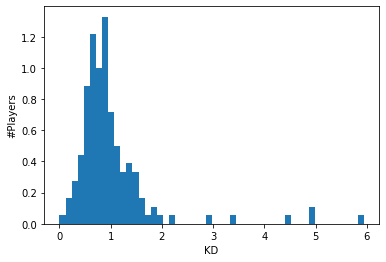

In [18]:
plt.hist(kds, density=True, bins=50)
plt.xlabel("KD")
plt.ylabel("#Players")

In [19]:
avg = round(sum(kds)/len(kds), 2)
math.floor(len(kds)/2)
median = round(sorted(kds)[math.floor(len(kds)/2)], 2)
kd_min = round(min(kds), 2)
kd_max = round(max(kds), 2)
top_ten = [round(kd, 2) for kd in sorted(kds)[math.floor(len(kds) * (80/100)):len(kds)]]
print("Game ID: " + match_id)
print("Team Placement: " + str(team_placement))
print("Team Kills")
print(team_stats)
print("Lobby Stats")
print("Average KD: " + str(avg))
print("Median KD: " + str(median))
print("Worst KD: " + str(kd_min))
print("Best KD:" + str(kd_max))
print("Top 20% KD: " + str([x for x in top_ten]))


Game ID: 11881516005138779616
Team Placement: 1.0
Team Kills
{'ZLaner': [23.0], 'OakBoi': [33.0], 'AydaN': [26.0], 'HusKerrs': [43.0]}
Lobby Stats
Average KD: 1.01
Median KD: 0.85
Worst KD: 0.0
Best KD:5.94
Top 20% KD: [1.23, 1.24, 1.24, 1.3, 1.31, 1.32, 1.34, 1.35, 1.37, 1.38, 1.39, 1.45, 1.49, 1.5, 1.5, 1.54, 1.54, 1.59, 1.63, 1.63, 1.72, 1.8, 1.83, 1.98, 2.19, 2.91, 3.4, 4.43, 4.9, 4.9, 5.94]


In [28]:
sorted_kds = sorted(kds)

In [29]:
sorted_kds = sorted_kds[:-4]
adj_avg = round(sum(sorted_kds)/len(sorted_kds), 2)
print(sorted_kds[-1])
print(len(sorted_kds))
print(adj_avg)

1.8446637426900585
146
0.9


In [91]:
max(kds)

1.1938642263412476

In [92]:
min(kds)

0.10810811072587967

[1.5371503829956055,
 1.583813190460205,
 1.587830901145935,
 1.6140122413635254,
 1.6569013595581055,
 1.6580125093460083,
 1.6593509912490845,
 2.345611095428467]

In [113]:
np.var(kds)

0.07022158280275911

In [30]:
resp_profile = requests.get('https://www.callofduty.com/api/papi-client/stats/cod/v1/title/mw/platform/uno/uno/12035878875057403705/profile/type/warzone', headers=headers, cookies=resp_login.cookies)
resp_profile.json()

{'status': 'error',
 'data': {'type': 'com.activision.mt.common.stdtools.exceptions.NoStackTraceException',
  'message': 'Not permitted: not allowed'}}

In [11]:
resp_profile.json()['data']['lifetime']['mode']['br']['properties']['kdRatio']

0.9722222222222222

In [222]:
'https://my.callofduty.com/api/papi-client/crm/cod/v2/title/mw/platform/uno/uno/4066176156082092197/matches/wz/start/0/end/0/details' \
--header 'Cookie: ACT_SSO_COOKIE=Set by test scripts; ACT_SSO_COOKIE_EXPIRY=1591153892430; atkn=Set by test scripts;'

SyntaxError: invalid syntax (<ipython-input-222-c6498561801d>, line 2)

In [20]:
resp_profile = requests.get('https://www.callofduty.com/api/papi-client/stats/cod/v1/title/mw/platform/psn/gamer/Viioozz/profile/type/warzone', headers=headers, cookies=resp_login.cookies)
resp_profile.json()

{'status': 'error',
 'data': {'type': 'com.activision.mt.common.stdtools.exceptions.NoStackTraceException',
  'message': 'Not permitted: not authenticated'}}